In [3]:
import numpy as np
import matplotlib.pyplot as plt

Peak range: 2 11


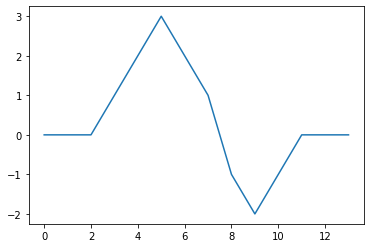

In [4]:

# define the array with the peak
array = np.array([0, 0, 0, 1, 2, 3, 2, 1, -1, -2, -1, 0, 0, 0])

plt.plot(array)

# find the peak and trough of the wave
peak_index = np.argmax(array)
trough_index = np.argmin(array[peak_index:]) + peak_index

# find the start and end of the peak range
start_index = peak_index - 1
while start_index > 0 and array[start_index] > 0:
    start_index -= 1
end_index = trough_index + 1
while end_index < len(array) and array[end_index] < 0:
    end_index += 1

# print the range of the peak
print("Peak range:", start_index, end_index)


In [6]:
import numpy as np

def find_peak_range(array):
    # find the peak and trough of the wave
    peak_index = np.argmax(array)
    trough_index = np.argmin(array[peak_index:]) + peak_index

    # find the start and end of the peak range
    start_index = peak_index - 1
    while start_index > 0 and array[start_index] > 0:
        start_index -= 1
    end_index = trough_index + 1
    while end_index < len(array) and array[end_index] < 0:
        end_index += 1

    return [start_index, end_index]


In [7]:
# define the array with the peak
array = np.array([0, 0, 0, 1, 2, 3, 2, 1, -1, -2, -1, 0, 0, 0])

# find the range of the peak
peak_range = find_peak_range(array)

# print the range of the peak
print("Peak range:", peak_range)

Peak range: [2, 11]


In [17]:
array.shape

(14,)

In [8]:
import sys
from os import listdir
from os.path import isfile, join

In [19]:
wireplane = "Z"
path = 'processed_data/'
filenames = [path+f for f in listdir(path) if (isfile(join(path, f)) and wireplane in f)]
filenames

['processed_data/mean_Z.npy',
 'processed_data/std_Z.npy',
 'processed_data/x_test_Z.npy',
 'processed_data/x_train_Z.npy',
 'processed_data/y_test_AE_Z.npy',
 'processed_data/y_test_ROI_Z.npy',
 'processed_data/y_train_AE_Z.npy',
 'processed_data/y_train_ROI_Z.npy']

In [20]:
y_test = np.load(filenames[4])

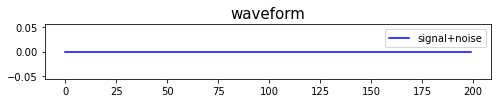

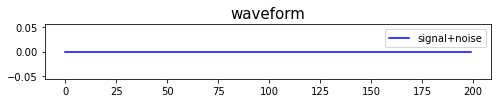

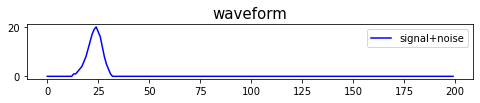

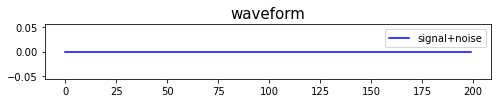

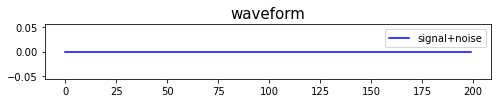

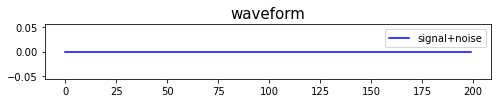

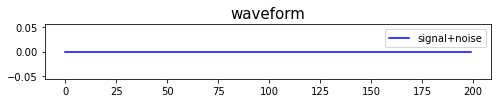

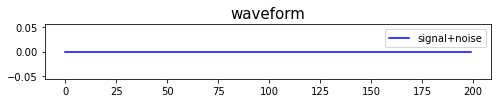

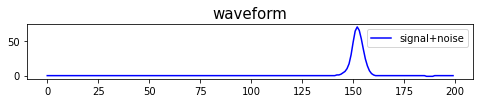

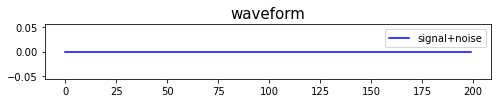

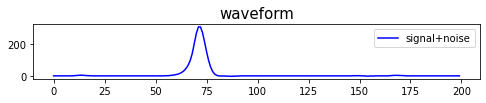

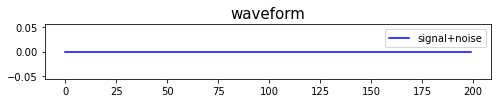

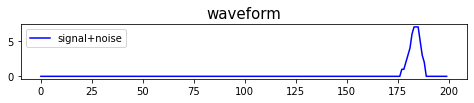

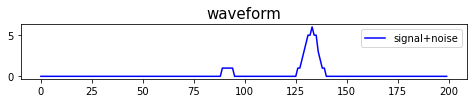

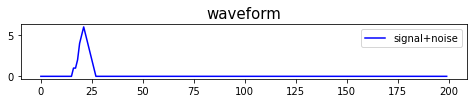

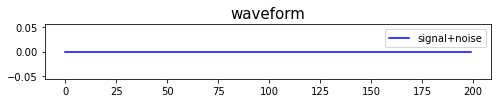

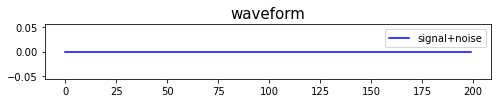

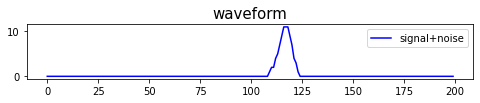

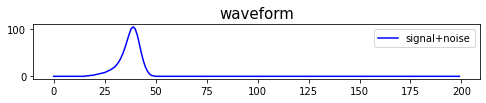

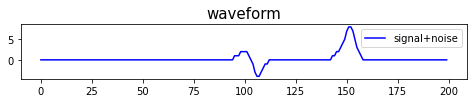

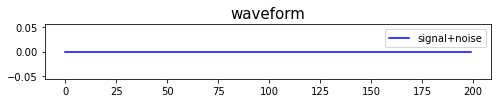

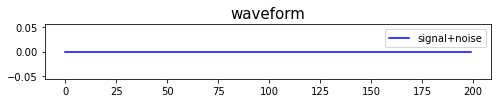

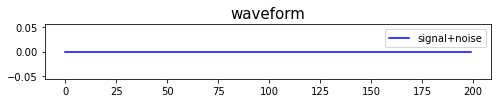

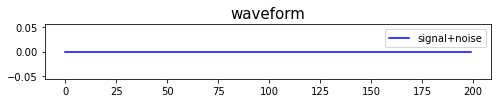

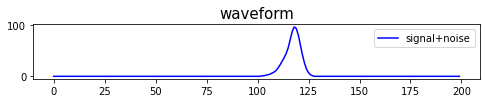

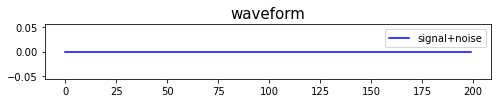

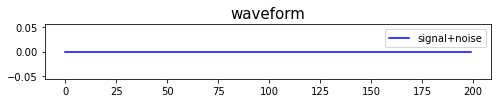

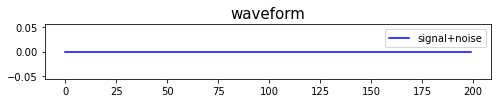

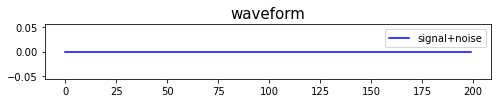

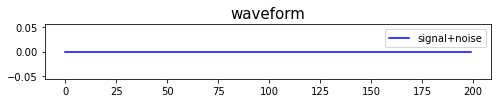

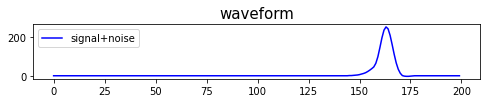

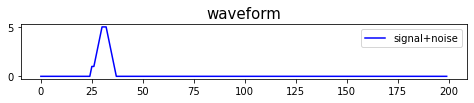

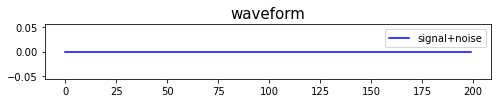

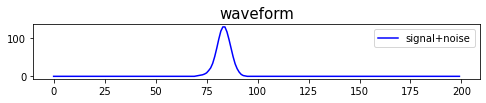

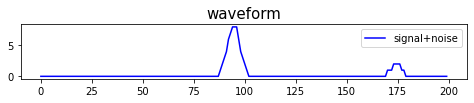

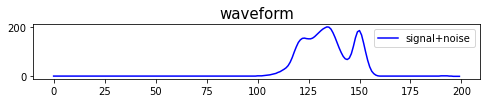

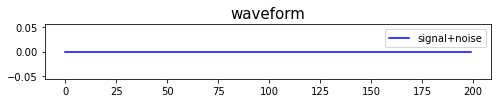

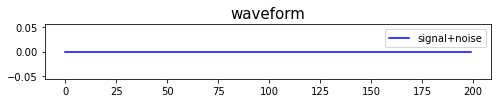

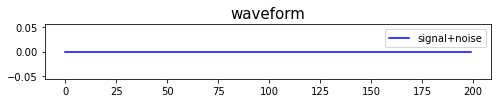

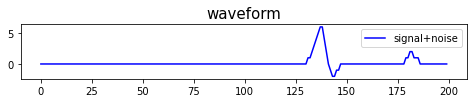

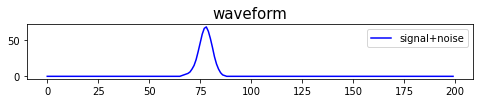

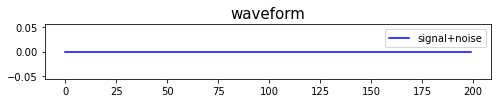

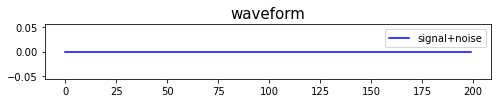

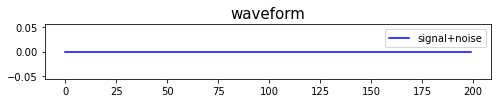

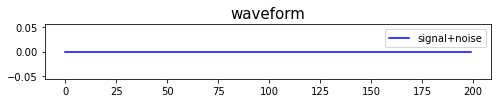

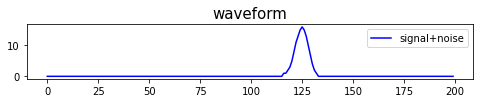

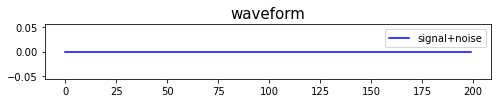

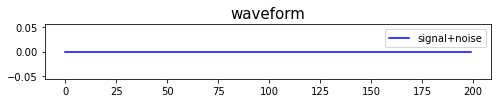

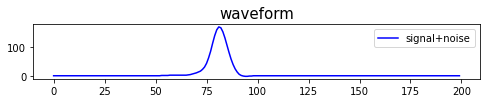

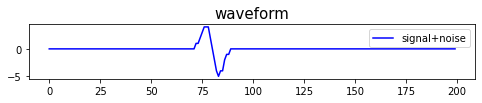

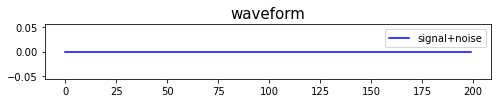

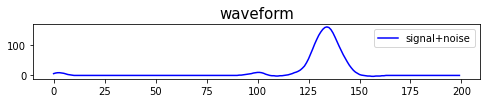

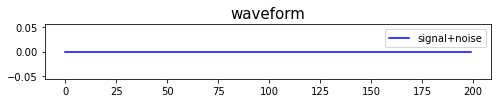

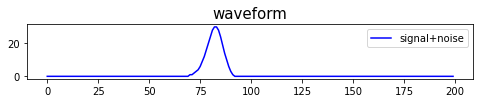

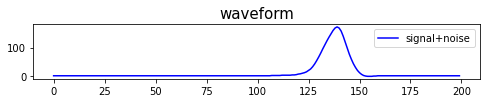

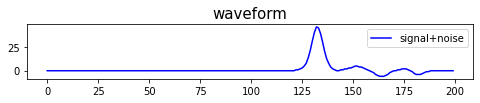

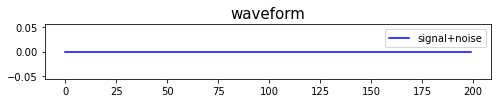

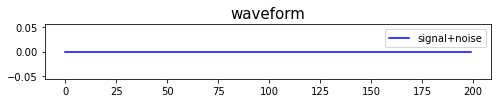

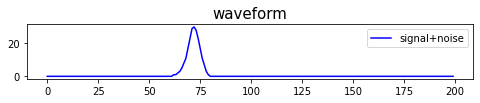

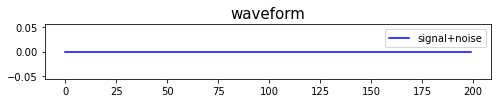

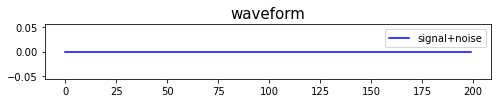

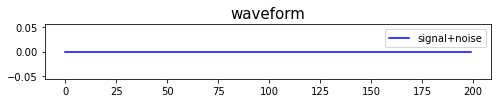

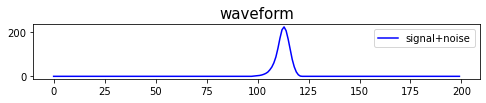

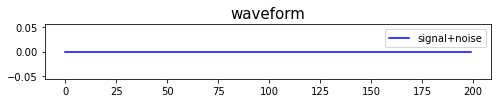

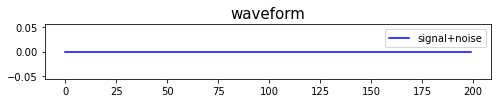

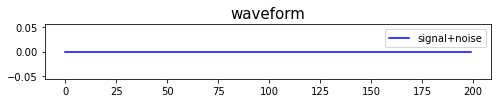

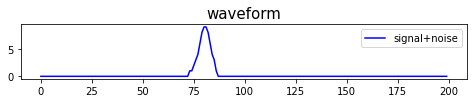

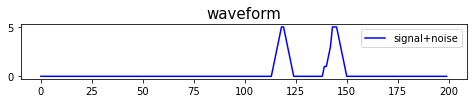

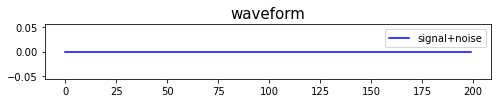

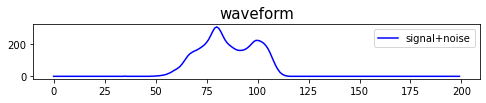

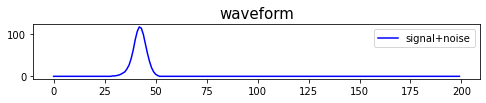

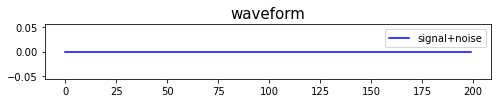

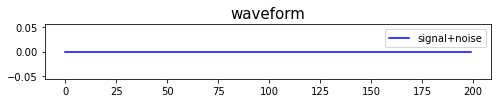

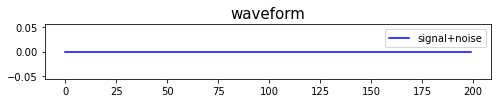

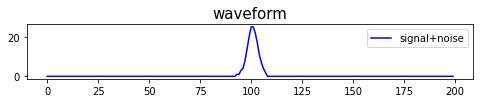

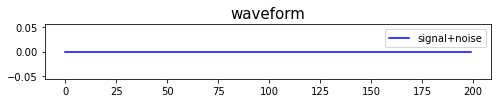

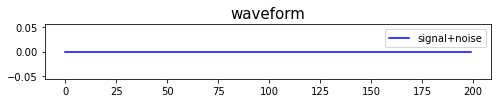

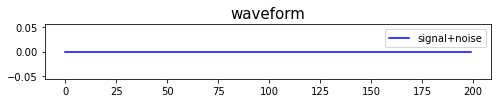

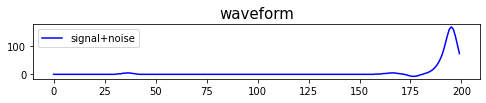

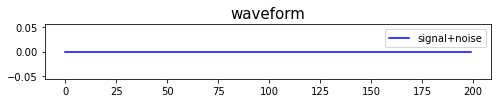

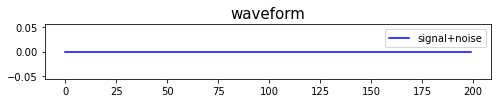

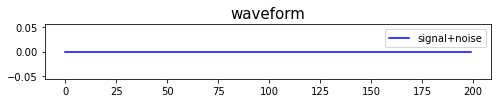

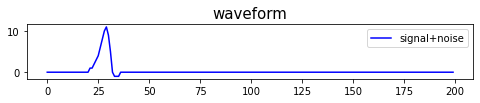

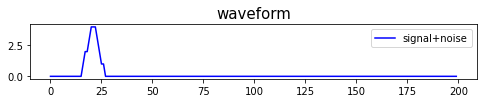

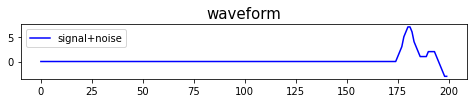

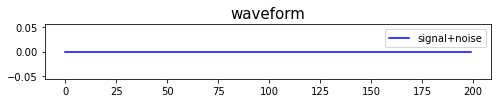

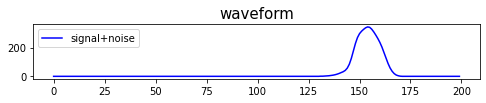

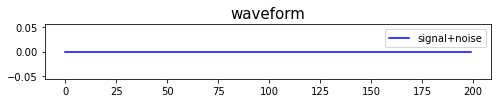

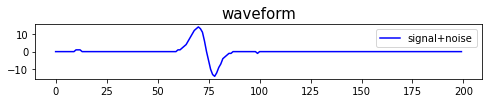

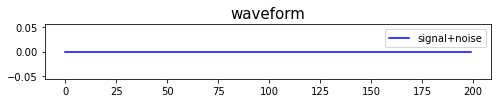

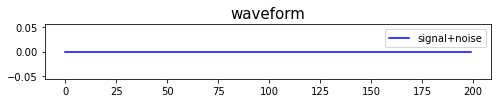

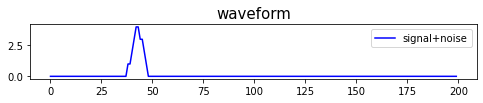

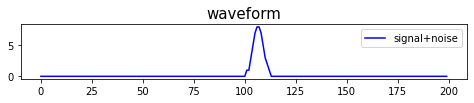

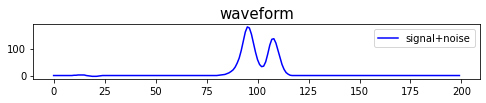

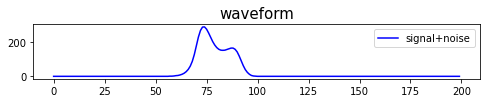

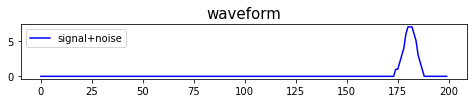

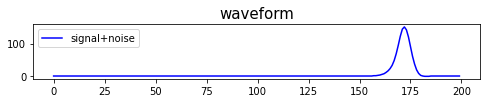

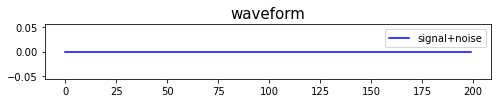

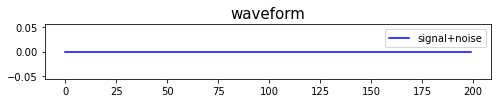

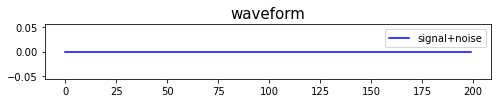

In [31]:
for idx in range(100):
    fig, (ax1) = plt.subplots(figsize=(8, 1), facecolor='white')
    ax1.plot(y_test[idx],color='blue', label='signal+noise')
    ax1.set_title("waveform", fontsize=15)
    ax1.legend()

    plt.show()

In [27]:
wave = y_test[2]
wave.shape

(200,)

In [28]:
peak_range = find_peak_range(wave)

# print the range of the peak
print("Peak range:", peak_range)

Peak range: [12, 33]


In [29]:
import numpy as np

# true values
true_values = np.array([1, 2, 3, 4, 5])

# predicted values
predicted_values = np.array([1.1, 2.1, 2.9, 4.1, 4.9])

# calculate MSE for the entire range
mse = np.mean((true_values - predicted_values)**2)
print("MSE for entire range:", mse)

# calculate MSE for values in the first half of the range
mse = np.mean((true_values[:len(true_values)//2] - predicted_values[:len(predicted_values)//2])**2)
print("MSE for first half of range:", mse)

# calculate MSE for values in the second half of the range
mse = np.mean((true_values[len(true_values)//2:] - predicted_values[len(predicted_values)//2:])**2)
print("MSE for second half of range:", mse)


MSE for entire range: 0.009999999999999981
MSE for first half of range: 0.010000000000000018
MSE for second half of range: 0.009999999999999959


In [30]:
def find_peak_range(array):
    # find the peak and trough of the wave
    peak_indexes = np.argwhere(array == np.amax(array))
    trough_indexes = np.argwhere(array[peak_indexes[0][0]:] == np.amin(array[peak_indexes[0][0]:])) + peak_indexes[0][0]

    peak_ranges = []
    for peak_index, trough_index in zip(peak_indexes, trough_indexes):
        # find the start and end of the peak range
        start_index = peak_index - 1
        while start_index > 0 and array[start_index] > 0:
            start_index -= 1
        end_index = trough_index + 1
        while end_index < len(array) and array[end_index] < 0:
            end_index += 1

        peak_ranges.append([start_index, end_index])

    return peak_ranges

# define the array with multiple peaks
array = np.array([0, 0, 0, 1, 2, 3, 2, 1, -1, -2, -1, 0, 0, 0, 0, 0, 0, 2, 3, 2, 1, 0, 0, 0])

# find the range of the peaks
peak_ranges = find_peak_range(array)

# print the range of the peaks
print("Peak ranges:", peak_ranges)

Peak ranges: [[array([2], dtype=int64), array([11], dtype=int64)]]
